In [1]:
import pandas as pd

filename = 'seoul_festival.xlsx'

In [2]:
df = pd.read_excel(filename)
df.head()

,분류,자치구,공연/행사명,날짜/시간,장소,기관명,이용대상,이용요금,출연자정보,프로그램소개,...,대표이미지,신청일,시민/기관,시작일,종료일,테마분류,위도(X좌표),경도(Y좌표),유무료,문화포털상세URL
0,뮤지컬/오페라,종로구,오페라 갈라,2024-12-07~2024-12-07,세종대극장,세종문화회관,7세 이상 관람 가능(2017년생부터 관람 가능),"SUITE석 140,000원 / VIP석 120,000원 / R석 100,000원 ...",NaN,<html><head></head><body spellcheck=,...,https://culture.seoul.go.kr/cmmn/file/getImage...,2024-01-26,기관,2024-12-07,2024-12-07,기타,37.572624,126.976005,유료,https://culture.seoul.go.kr/culture/culture/cu...
1,클래식,마포구,[마포문화재단] M 아티스트 2024 김동현 바이올린 리사이틀 II,2024-12-06~2024-12-06,마포아트센터 아트홀맥,마포문화재단,8세이상 관람가능(미취학아동입장불가),"R석 55,000원, S석 44,000원, A석 33,000원",NaN,NaN,...,https://culture.seoul.go.kr/cmmn/file/getImage...,2024-05-16,기관,2024-12-06,2024-12-06,기타,37.549906,126.945534,유료,https://culture.seoul.go.kr/culture/culture/cu...
2,클래식,종로구,서울시합창단 송년음악회,2024-12-05~2024-12-05,세종대극장,세종문화회관,7세 이상 관람 가능(2017년생부터 관람 가능),"R 50,000원 / S 40,000원 / A 30,000원",NaN,NaN,...,https://culture.seoul.go.kr/cmmn/file/getImage...,2024-01-26,기관,2024-12-05,2024-12-05,기타,37.572624,126.976005,유료,https://culture.seoul.go.kr/culture/culture/cu...
3,전시/미술,강남구,2024 서울 일러스트코리아 winter,2024-11-29~2024-12-01,양재 aT센터,기타,누구나,"정가 10,000원ㅣ사전등록 후 사전 결제가 : ~ 11월 28일(목)까지 결제시5...",NaN,NaN,...,https://culture.seoul.go.kr/cmmn/file/getImage...,2024-04-17,시민,2024-11-29,2024-12-01,기타,37.468279,127.039136,유료,https://culture.seoul.go.kr/culture/culture/cu...
4,클래식,종로구,"2024 카즈미 타테이시 트리오 내한공연-지브리, 재즈를 만나다-(서울 세종)",2024-11-29~2024-11-30,세종문화회관 M씨어터,기타,만 7세 이상,"VIP석 77,000원 R석 66,000원 S석 55,000원",NaN,NaN,...,https://culture.seoul.go.kr/cmmn/file/getImage...,2024-07-23,시민,2024-11-29,2024-11-30,기타,37.572624,126.976005,유료,https://culture.seoul.go.kr/culture/culture/cu...


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = 'LARD_ADM_SECT_SGG_11_202405.shp'

seoul = gpd.read_file(shapefile_path)
seoul.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry
0,11110,서울특별시 종로구,11.0,11110,"POLYGON ((197799.999 559069.695, 197785.848 55..."
1,11140,서울특별시 중구,34.0,11140,"POLYGON ((202072.448 552243.432, 202072.646 55..."
2,11170,서울특별시 용산구,1.0,11170,"POLYGON ((197569.65 550564.919, 197580.635 550..."
3,11200,서울특별시 성동구,1.0,11200,"POLYGON ((203845.364 552528.28, 203846.364 552..."
4,11215,서울특별시 광진구,49.0,11215,"POLYGON ((208984.357 552552.194, 209038.174 55..."


In [4]:
type(seoul)

geopandas.geodataframe.GeoDataFrame

In [5]:
seoul['SGG_NM'] = seoul['SGG_NM'].str.replace('서울특별시 ', '')
seoul.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry
0,11110,종로구,11.0,11110,"POLYGON ((197799.999 559069.695, 197785.848 55..."
1,11140,중구,34.0,11140,"POLYGON ((202072.448 552243.432, 202072.646 55..."
2,11170,용산구,1.0,11170,"POLYGON ((197569.65 550564.919, 197580.635 550..."
3,11200,성동구,1.0,11200,"POLYGON ((203845.364 552528.28, 203846.364 552..."
4,11215,광진구,49.0,11215,"POLYGON ((208984.357 552552.194, 209038.174 55..."


In [6]:
gu_counts = df['자치구'].value_counts().reset_index()
gu_counts.columns = ['자치구', '행_카운트']
gu_counts.head()

,자치구,행_카운트
0,종로구,1233
1,중구,460
2,은평구,300
3,마포구,275
4,송파구,231


In [7]:
merged = seoul.merge(gu_counts, left_on='SGG_NM', right_on='자치구', how='left')
merged

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry,자치구,행_카운트
0,11110,종로구,11.0,11110,"POLYGON ((197799.999 559069.695, 197785.848 55...",종로구,1233
1,11140,중구,34.0,11140,"POLYGON ((202072.448 552243.432, 202072.646 55...",중구,460
2,11170,용산구,1.0,11170,"POLYGON ((197569.65 550564.919, 197580.635 550...",용산구,128
3,11200,성동구,1.0,11200,"POLYGON ((203845.364 552528.28, 203846.364 552...",성동구,161
4,11215,광진구,49.0,11215,"POLYGON ((208984.357 552552.194, 209038.174 55...",광진구,146
5,11230,동대문구,232.0,11230,"POLYGON ((206279.037 556389.087, 206279.461 55...",동대문구,144
6,11260,중랑구,34.0,11260,"POLYGON ((209826.455 557905.251, 209900.353 55...",중랑구,48
7,11290,성북구,NaN,11290,"POLYGON ((198716.653 559591.405, 198756.989 55...",성북구,124
8,11305,강북구,1.0,11305,"POLYGON ((200399.264 565046.926, 200487.338 56...",강북구,214
9,11320,도봉구,1.0,11320,"POLYGON ((201909.086 566702.161, 201953.233 56...",도봉구,95


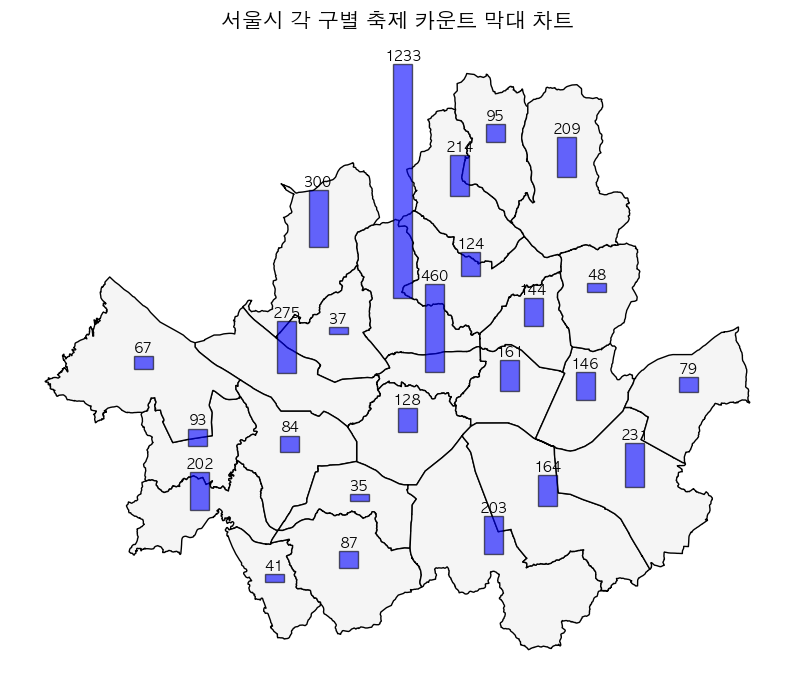

In [8]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 기본 지도 그리기
seoul.plot(ax=ax, color='whitesmoke', edgecolor='black')

# 자치구 중심 좌표 계산
merged['center'] = merged['geometry'].centroid

# 막대 그리기
scale_factor = 10

for idx, row in merged.iterrows():
    if not pd.isna(row['행_카운트']):
        x = row['center'].x
        y = row['center'].y
        ax.bar(x, row['행_카운트'] * scale_factor, bottom=y, width=1000, color='blue', alpha=0.6, edgecolor='black')

        # 막대 위에 숫자 표시
        ax.text(x, y + row['행_카운트'] * scale_factor + 200, str(int(row['행_카운트'])), ha='center', fontsize=10, color='black')

# x, y 축 제거
ax.set_axis_off()

# 제목 설정
ax.set_title('서울시 각 구별 축제 카운트 막대 차트', fontdict={'fontsize': 15})

# 그래프 표시
plt.show()

In [9]:
gu_counts.head()

,자치구,행_카운트
0,종로구,1233
1,중구,460
2,은평구,300
3,마포구,275
4,송파구,231


In [10]:
second_max_value = gu_counts['행_카운트'].nlargest(2).iloc[-1]
clip_value = second_max_value + 100
clipped_counts = gu_counts['행_카운트'].clip(upper=clip_value)
clipped_counts.head()

0    560
1    460
2    300
3    275
4    231
Name: 행_카운트, dtype: int64

In [11]:
import matplotlib.colors as mcolors
from matplotlib.colors import *

norm = mcolors.Normalize(vmin=clipped_counts.min(), vmax=clipped_counts.max())
cmap = plt.cm.Greens
colors = cmap(norm(clipped_counts))


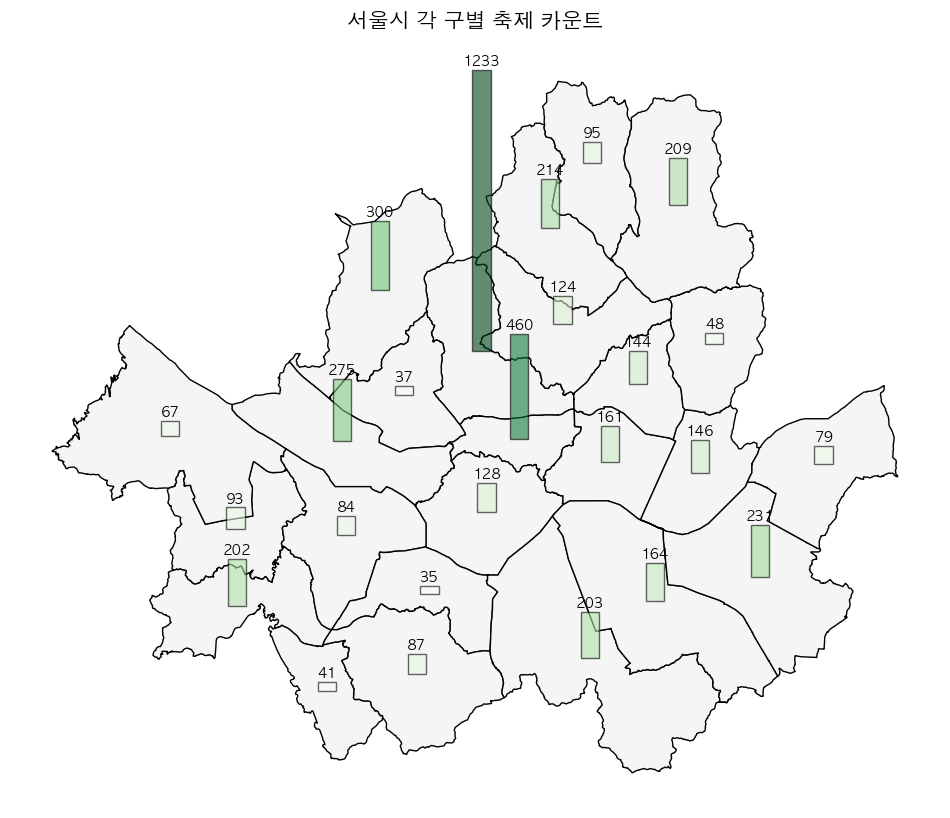

In [12]:
from shapely.geometry import *


# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
seoul.plot(ax=ax, color='whitesmoke', edgecolor='black')

# 자치구 중심 좌표 계산
merged['center'] = merged['geometry'].centroid

# 막대 그리기
scale_factor = 10  # 막대 크기 조절을 위한 스케일 팩터
for idx, row in merged.iterrows():
    if not pd.isna(row['행_카운트']):
        x = row['center'].x
        y = row['center'].y
        ax.bar(x, row['행_카운트'] * scale_factor, bottom=y, width=800, color=cmap(norm(row['행_카운트'])), edgecolor='black', alpha=0.6)

        # 막대 위에 원본 데이터 숫자 표시
        ax.text(x, y + row['행_카운트'] * scale_factor + 200, str(int(row['행_카운트'])), ha='center', fontsize=10, color='black')

# x, y 축 제거
ax.set_axis_off()

# 제목 설정
ax.set_title('서울시 각 구별 축제 카운트', fontsize=15)

# 그래프 표시
plt.show()

In [13]:
population = pd.read_excel('seoul_population.xlsx')
population.head()

/Users/chan/Library/Caches/pypoetry/virtualenvs/week03-advanced-2-FcizQfbr-py3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,동별(1),동별(2),동별(3),2023,2023.1,2023.2
0,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
1,합계,소계,소계,9638799,605.2,15927
2,NaN,종로구,소계,150453,23.91,6292
3,NaN,중구,소계,131793,9.96,13232
4,NaN,용산구,소계,227106,21.87,10386


In [14]:
population = population.drop(columns=['동별(1)', '동별(3)'])
population = population.drop(labels=[0, 1])
population.columns = ['자치구', '인구(명)', '면적(km^2)', '밀도']
population = population.reset_index(drop=True)
population

,자치구,인구(명),면적(km^2),밀도
0,종로구,150453,23.91,6292
1,중구,131793,9.96,13232
2,용산구,227106,21.87,10386
3,성동구,284766,16.82,16930
4,광진구,351180,17.06,20582
5,동대문구,359873,14.22,25315
6,중랑구,387470,18.5,20948
7,성북구,438168,24.58,17828
8,강북구,292977,23.6,12414
9,도봉구,309494,20.65,14987


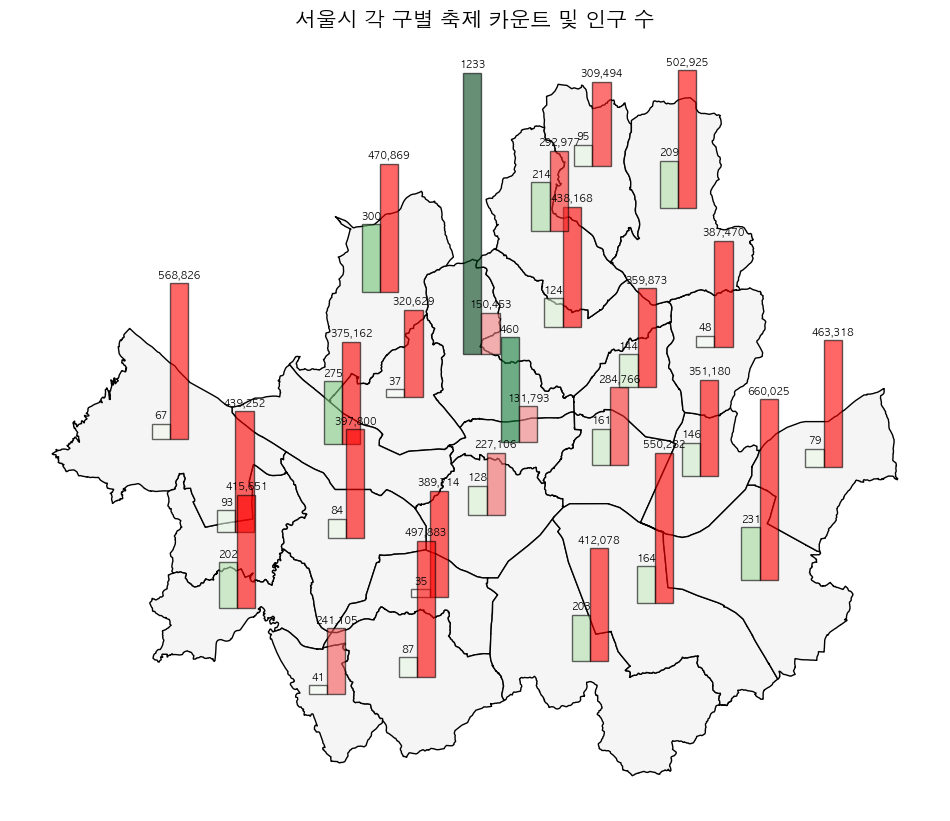

In [38]:
from matplotlib.colors import Normalize, LinearSegmentedColormap

# population DataFrame을 자치구를 기준으로 merged GeoDataFrame과 병합
population_merged = merged.merge(population[['자치구', '인구(명)']], left_on='SGG_NM', right_on='자치구', how='left')

# 인구수 컬러 매핑을 위한 그래디언트 설정 (빨간색)
population_norm = Normalize(vmin=population_merged['인구(명)'].min() * 1.5, vmax=population_merged['인구(명)'].max() * .5)
population_cmap = LinearSegmentedColormap.from_list('red_gradient', ['lightcoral', 'red'])

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
seoul.plot(ax=ax, color='whitesmoke', edgecolor='black')

# 자치구 중심 좌표 계산
population_merged['center'] = population_merged['geometry'].centroid

# 막대 그리기
festival_scale_factor = 10  # 축제 카운트 막대 크기 조절을 위한 스케일 팩터
population_scale_factor = 0.012  # 인구수 막대 크기 조절을 위한 스케일 팩터

for idx, row in population_merged.iterrows():
    if not pd.isna(row['행_카운트']) and not pd.isna(row['인구(명)']):
        x = row['center'].x
        y = row['center'].y

        # 축제 카운트 막대 그리기
        ax.bar(x - 400, row['행_카운트'] * festival_scale_factor, bottom=y, width=800, color=cmap(norm(row['행_카운트'])), edgecolor='black', alpha=0.6)

        # 인구 수 막대 그리기 (빨간색 그래디언트 적용)
        population_color = population_cmap(population_norm(row['인구(명)']))
        ax.bar(x + 400, row['인구(명)'] * population_scale_factor, bottom=y, width=800, color=population_color, edgecolor='black', alpha=0.6)

        # 축제 카운트 숫자 표시
        ax.text(x - 400, y + row['행_카운트'] * festival_scale_factor + 200, str(int(row['행_카운트'])), ha='center', fontsize=7, color='black')

        # 인구 수 숫자 표시
        ax.text(x + 400, y + row['인구(명)'] * population_scale_factor + 200, f'{int(row["인구(명)"]):,}', ha='center', fontsize=7, color='black')

# x, y 축 제거
ax.set_axis_off()

# 제목 설정
ax.set_title('서울시 각 구별 축제 카운트 및 인구 수', fontsize=15)

# 그래프 표시
plt.show()


In [16]:
population_density_merged = merged.merge(population, left_on='SGG_NM', right_on='자치구', how='left')
population_density_merged.rename(columns={'행_카운트': '문화_행사_수', 'SGG_NM': '자치구'}, inplace=True)
population_density_merged.drop(columns=['자치구_x', '자치구_y'], inplace=True)
population_density_merged.head()

,ADM_SECT_C,자치구,SGG_OID,COL_ADM_SE,geometry,문화_행사_수,center,인구(명),면적(km^2),밀도
0,11110,종로구,11.0,11110,"POLYGON ((197799.999 559069.695, 197785.848 55...",1233,POINT (198000.078 555038.078),150453,23.91,6292
1,11140,중구,34.0,11140,"POLYGON ((202072.448 552243.432, 202072.646 55...",460,POINT (199644.109 551179.416),131793,9.96,13232
2,11170,용산구,1.0,11170,"POLYGON ((197569.65 550564.919, 197580.635 550...",128,POINT (198225.833 547988.021),227106,21.87,10386
3,11200,성동구,1.0,11200,"POLYGON ((203845.364 552528.28, 203846.364 552...",161,POINT (203629.029 550169.977),284766,16.82,16930
4,11215,광진구,49.0,11215,"POLYGON ((208984.357 552552.194, 209038.174 55...",146,POINT (207580.274 549695.238),351180,17.06,20582


In [17]:
infra = pd.read_excel('seoul_culture_infra.xlsx')
infra.rename(columns={'지역': '자치구'}, inplace=True)
infra.head()

,메인 키,분류명,공간명(한글),공간명(영어),개관년도,자치구,우편번호,주소,상세주소,전화번호,홈페이지
0,1,전시시설,[의외의 조합]_청년예술공간지원사업 선정공간,combination,2016,중구,4603,서울시 중구 동호로17길 121 (신당동),(의외의 조합),NaN,NaN
1,2,전시시설,[17717]_청년예술공간지원사업 선정공간,17717,2014,성북구,2835,서울시 성북구 성북로8길 11 (성북동),지하 (17717),NaN,http://17717.co.kr/
2,3,전시시설,[space55]_청년예술공간지원사업 선정공간,space55,2017,은평구,3452,서울시 은평구 증산로19길 9-3 (신사동),(space55),NaN,http://www.space55.co.kr/
3,4,공연장,[게토얼라이브]_청년예술공간지원사업 선정공간,ghettoalive,2016,성동구,4778,"서울시 성동구 왕십리로 104 (성수동1가, 영화빌딩)",지하 1층 Ghetto_alive,02-461-1125,NaN
4,5,전시시설,[대안예술공간이포]_청년예술공간지원사업 선정공간,deaan,2008,영등포구,7299,서울시 영등포구 도림로126길 9 (문래동3가),(대안예술공간이포),NaN,NaN


In [18]:
infra_count = infra['자치구'].value_counts().reset_index()
infra_count.rename(columns={'count': '문화_시설_수'}, inplace=True)
infra_count.drop(index=25, inplace=True)
infra_count

,자치구,문화_시설_수
0,종로구,383
1,강남구,115
2,중구,56
3,마포구,48
4,서초구,41
5,영등포구,27
6,서대문구,26
7,송파구,25
8,성북구,25
9,광진구,24


In [19]:
print(population_density_merged['자치구'].dtype)
print(infra_count['자치구'].dtype)

object
object


In [20]:
population_density_merged['자치구'] = population_density_merged['자치구'].str.strip()
infra_count['자치구'] = infra_count['자치구'].str.strip()

In [21]:
total_merged = population_density_merged.merge(infra_count, left_on='자치구', right_on='자치구', how='left')
total_merged.head()

,ADM_SECT_C,자치구,SGG_OID,COL_ADM_SE,geometry,문화_행사_수,center,인구(명),면적(km^2),밀도,문화_시설_수
0,11110,종로구,11.0,11110,"POLYGON ((197799.999 559069.695, 197785.848 55...",1233,POINT (198000.078 555038.078),150453,23.91,6292,383
1,11140,중구,34.0,11140,"POLYGON ((202072.448 552243.432, 202072.646 55...",460,POINT (199644.109 551179.416),131793,9.96,13232,56
2,11170,용산구,1.0,11170,"POLYGON ((197569.65 550564.919, 197580.635 550...",128,POINT (198225.833 547988.021),227106,21.87,10386,24
3,11200,성동구,1.0,11200,"POLYGON ((203845.364 552528.28, 203846.364 552...",161,POINT (203629.029 550169.977),284766,16.82,16930,16
4,11215,광진구,49.0,11215,"POLYGON ((208984.357 552552.194, 209038.174 55...",146,POINT (207580.274 549695.238),351180,17.06,20582,24


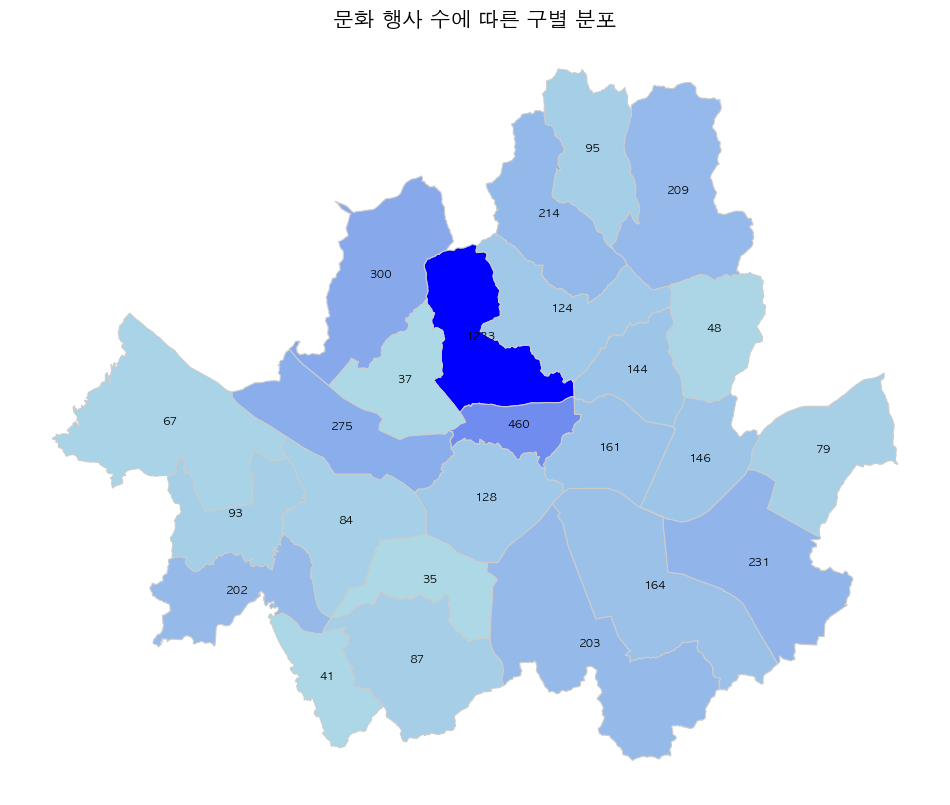

In [22]:
# 컬러 그래디언트 설정
norm_event = Normalize(vmin=total_merged['문화_행사_수'].min(), vmax=total_merged['문화_행사_수'].max())
cmap_event = LinearSegmentedColormap.from_list("event_gradient", ["lightblue", "blue"])

# 플롯 생성
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
total_merged.plot(column='문화_행사_수', cmap=cmap_event, linewidth=0.8, ax=ax, edgecolor='0.8', norm=norm_event)

# 각 지역에 숫자 표시
for idx, row in total_merged.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, str(row['문화_행사_수']),
             horizontalalignment='center', fontsize=8, color='black')

# 축 제거
ax.set_axis_off()

# 제목 설정
ax.set_title('문화 행사 수에 따른 구별 분포', fontsize=15)

# 그래프 표시
plt.show()


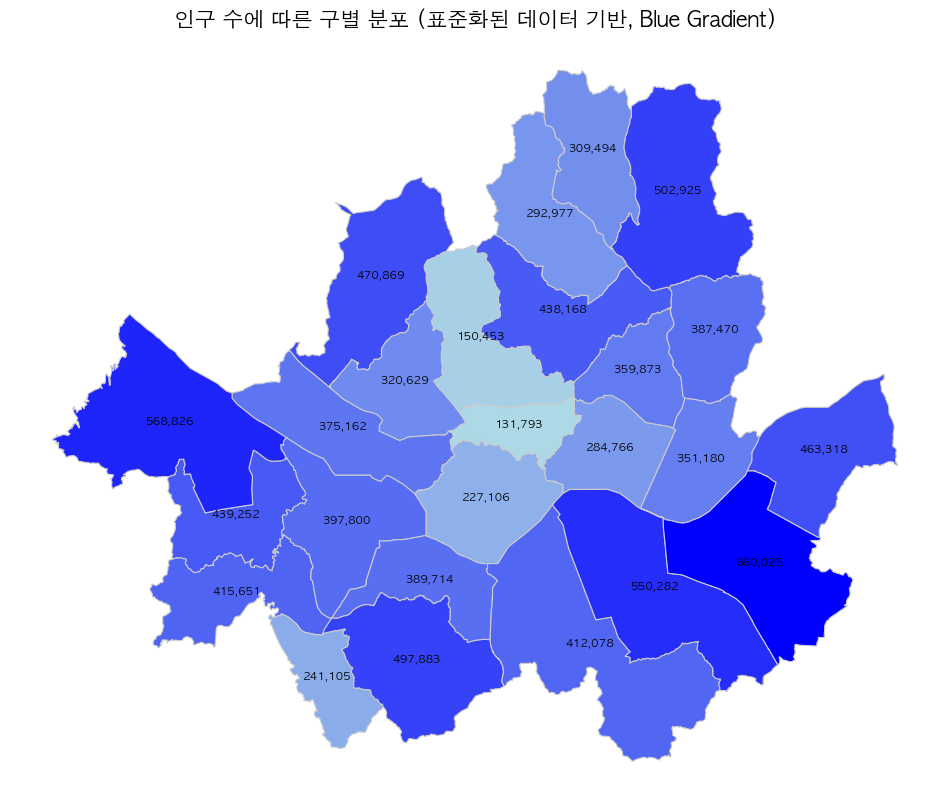

In [34]:
from sklearn.preprocessing import StandardScaler

# 인구 데이터를 표준화
scaler = StandardScaler()
total_merged['std_population'] = scaler.fit_transform(total_merged[['인구(명)']])

# 하나의 색상으로 그래디언트 생성 (blue 색상)
cmap_population = LinearSegmentedColormap.from_list("blue_gradient", ["lightblue", "blue"])

# 컬러 그래디언트 설정 (표준화된 인구 데이터를 기준으로)
norm_std_population = Normalize(vmin=total_merged['std_population'].min(), vmax=total_merged['std_population'].max())

# 플롯 생성
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
total_merged.plot(column='std_population', cmap=cmap_population, linewidth=0.8, ax=ax, edgecolor='0.8', norm=norm_std_population)

# 각 지역에 원래 인구 수 숫자 표시
for idx, row in total_merged.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{int(row['인구(명)']):,}",
             horizontalalignment='center', fontsize=8, color='black')

# 축 제거
ax.set_axis_off()

# 제목 설정
ax.set_title('인구 수에 따른 구별 분포 (표준화된 데이터 기반, Blue Gradient)', fontsize=15)

# 그래프 표시
plt.show()



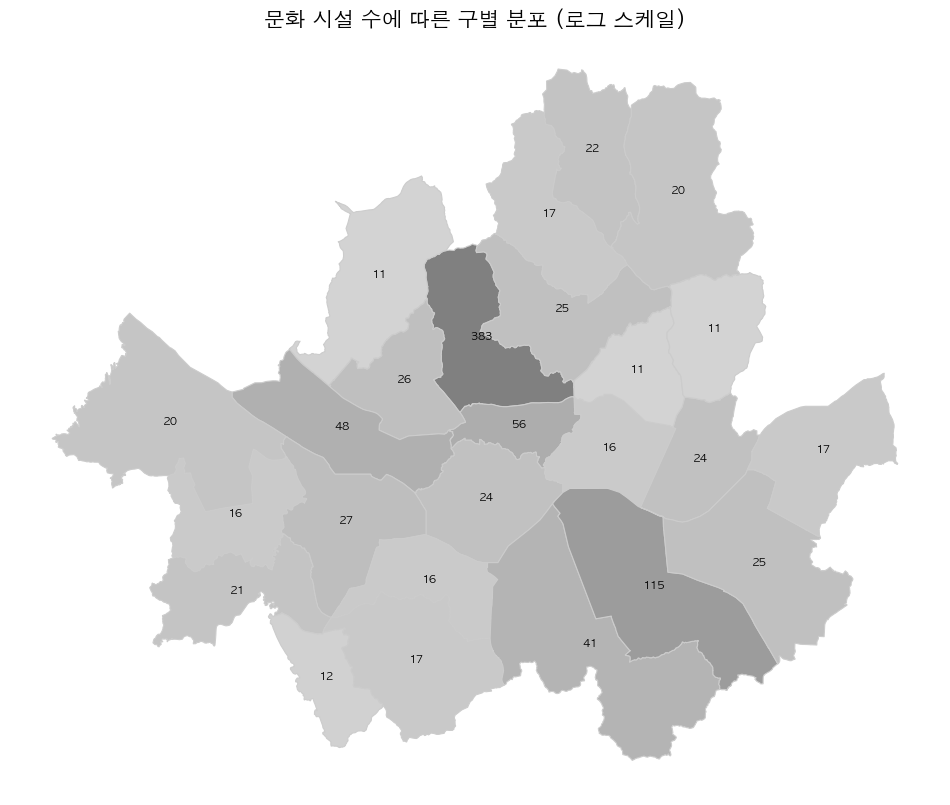

In [35]:
# 컬러 그래디언트 설정 (LogNorm 사용)
norm_facility = LogNorm(vmin=total_merged['문화_시설_수'].min(), vmax=total_merged['문화_시설_수'].max())
cmap_facility = LinearSegmentedColormap.from_list("facility_gradient", ["lightgrey", "grey"])

# 플롯 생성
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
total_merged.plot(column='문화_시설_수', cmap=cmap_facility, linewidth=0.8, ax=ax, edgecolor='0.8', norm=norm_facility)

# 각 지역에 숫자 표시
for idx, row in total_merged.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, str(row['문화_시설_수']),
             horizontalalignment='center', fontsize=8, color='black')

# 축 제거
ax.set_axis_off()

# 제목 설정
ax.set_title('문화 시설 수에 따른 구별 분포 (로그 스케일)', fontsize=15)

# 그래프 표시
plt.show()


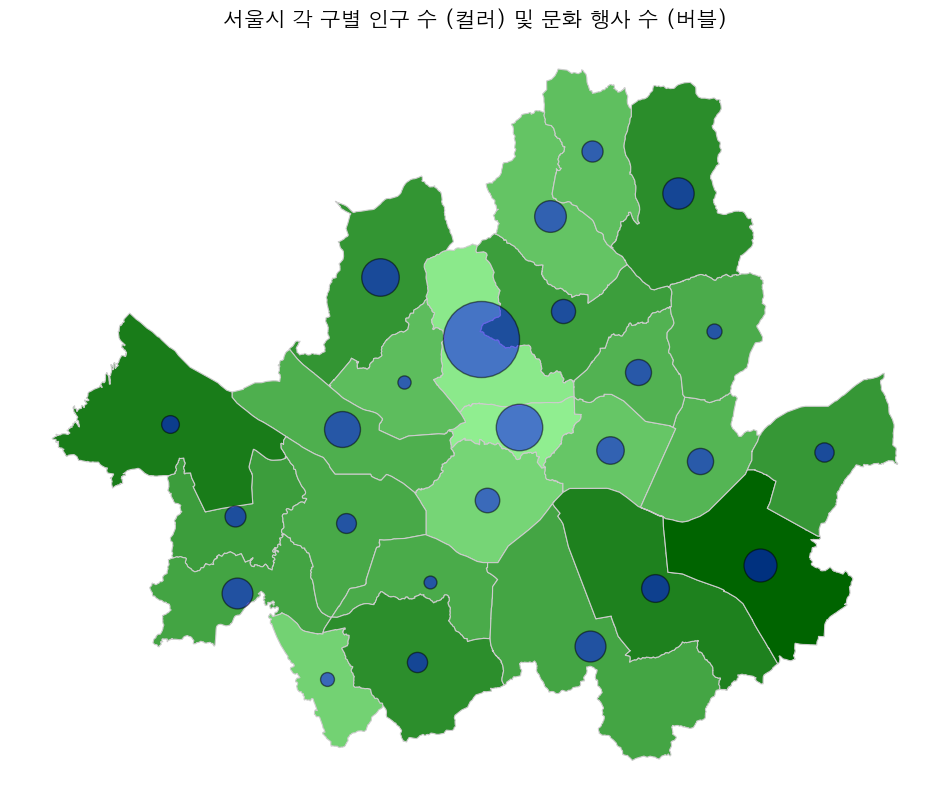

In [42]:
# 인구 수 데이터 표준화
scaler = StandardScaler()
total_merged['std_population'] = scaler.fit_transform(total_merged[['인구(명)']])

# 컬러 그래디언트 설정 (인구 수 기준)
cmap_population = LinearSegmentedColormap.from_list("green_gradient", ["lightgreen", "darkgreen"])
norm_population = Normalize(vmin=total_merged['std_population'].min(), vmax=total_merged['std_population'].max())

# 플롯 생성
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
total_merged.plot(column='std_population', cmap=cmap_population, linewidth=0.8, ax=ax, edgecolor='0.8', norm=norm_population)

# 문화 행사 수를 원의 크기로 표시
max_event = total_merged['문화_행사_수'].max()
for idx, row in total_merged.iterrows():
    plt.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=(row['문화_행사_수'] / max_event) * 3000, color='blue', alpha=0.5, edgecolor='black')

# 축 제거
ax.set_axis_off()

# 제목 설정
ax.set_title('서울시 각 구별 인구 수 (컬러) 및 문화 행사 수 (버블)', fontsize=15)

# 그래프 표시
plt.show()

In [57]:
land = pd.read_excel('seoul_land.xlsx')
land.columns = land.iloc[1]
land.drop(columns=['동별(1)'], index=[0, 1, 2], inplace=True)
land.reset_index(drop=True, inplace=True)
land.rename(columns={'동별(2)': '자치구'}, inplace=True)
land.head()

/Users/chan/Library/Caches/pypoetry/virtualenvs/week03-advanced-2-FcizQfbr-py3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


1,자치구,소계,전,답,과수원,목장용지,임야,광천지,염전,대지,...,유지,양어장,수도용지,공원,체육용지,유원지,종교용지,사적지,묘지,잡종지
0,종로구,23913222.8,799040.5,-,-,-,9359264.1,-,-,8197081.1,...,-,-,85.2,320402.3,-,-,106967.4,1244517.4,11001,104115.2
1,중구,9959947.4,-,-,-,-,1273303,-,-,5194309.2,...,-,-,28260.6,463037.4,17811.1,-,114361.9,103210.1,-,6166
2,용산구,21867577.4,36275.5,-,-,-,1602504,-,-,10085427.5,...,44896.3,-,401.8,139743.4,1299.2,-,84574.5,1548,43594,546468.3
3,성동구,16820149,163863.3,15023,-,-,257420.2,-,-,6244650.7,...,99218.2,-,259636,722727.6,22067.5,121,75372.2,-,11996,737278.6
4,광진구,17062820.1,26128,11122,-,-,2472892.4,-,-,7011305.6,...,37065.4,-,289620.5,724800.9,36739,-,54459.9,-,8367,20076.9


In [66]:
# '자치구' 열을 제외한 모든 열을 숫자로 변환하고, NaN을 0으로 대체
land.loc[:, land.columns != '자치구'] = land.loc[:, land.columns != '자치구'].apply(lambda x: pd.to_numeric(x, errors='coerce').fillna(0) / 1_000_000)
land.drop(columns='소계', inplace=True)
# 결과 확인
land.head()


1,자치구,전,답,과수원,목장용지,임야,광천지,염전,대지,공장용지,...,유지,양어장,수도용지,공원,체육용지,유원지,종교용지,사적지,묘지,잡종지
0,종로구,0.000001,0.0,0.0,0.0,0.000009,0.0,0.0,0.000008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.0,0.0
1,중구,0.0,0.0,0.0,0.0,0.000001,0.0,0.0,0.000005,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,용산구,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.00001,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001
3,성동구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000006,0.0,...,0.0,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.000001
4,광진구,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.000007,0.0,...,0.0,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
merged_data = total_merged.merge(land, on='자치구', how='left')
merged_data.head()

,ADM_SECT_C,자치구,SGG_OID,COL_ADM_SE,geometry,문화_행사_수,center,인구(명),면적(km^2),밀도,...,유지,양어장,수도용지,공원,체육용지,유원지,종교용지,사적지,묘지,잡종지
0,11110,종로구,11.0,11110,"POLYGON ((197799.999 559069.695, 197785.848 55...",1233,POINT (198000.078 555038.078),150453,23.91,6292,...,0.0,0.0,0.000085,0.320402,0.0,0.0,0.106967,1.244517,0.011001,0.104115
1,11140,중구,34.0,11140,"POLYGON ((202072.448 552243.432, 202072.646 55...",460,POINT (199644.109 551179.416),131793,9.96,13232,...,0.0,0.0,0.028261,0.463037,0.017811,0.0,0.114362,0.10321,0.0,0.006166
2,11170,용산구,1.0,11170,"POLYGON ((197569.65 550564.919, 197580.635 550...",128,POINT (198225.833 547988.021),227106,21.87,10386,...,0.044896,0.0,0.000402,0.139743,0.001299,0.0,0.084574,0.001548,0.043594,0.546468
3,11200,성동구,1.0,11200,"POLYGON ((203845.364 552528.28, 203846.364 552...",161,POINT (203629.029 550169.977),284766,16.82,16930,...,0.099218,0.0,0.259636,0.722728,0.022068,0.000121,0.075372,0.0,0.011996,0.737279
4,11215,광진구,49.0,11215,"POLYGON ((208984.357 552552.194, 209038.174 55...",146,POINT (207580.274 549695.238),351180,17.06,20582,...,0.037065,0.0,0.289621,0.724801,0.036739,0.0,0.05446,0.0,0.008367,0.020077


In [69]:
land_list = list(land.columns)[1:]
land_list

['전',
 '답',
 '과수원',
 '목장용지',
 '임야',
 '광천지',
 '염전',
 '대지',
 '공장용지',
 '학교용지',
 '주차장',
 '주유소용지',
 '창고용지',
 '도로',
 '철도용지',
 '제방',
 '하천',
 '구거',
 '유지',
 '양어장',
 '수도용지',
 '공원',
 '체육용지',
 '유원지',
 '종교용지',
 '사적지',
 '묘지',
 '잡종지']

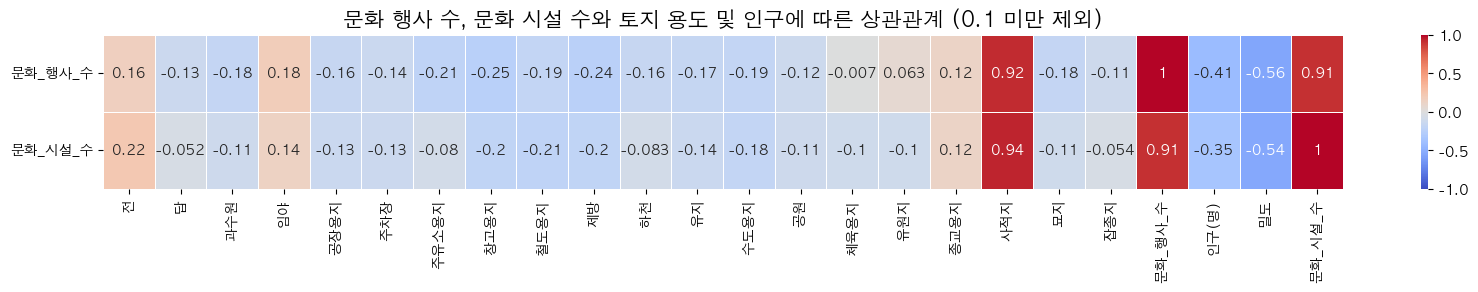

In [83]:
import seaborn as sns


# 전체 상관관계 행렬 계산
correlation_matrix = merged_data[land_list + ['문화_행사_수', '인구(명)', '면적(km^2)', '밀도', '문화_시설_수']].corr()

# '문화_행사_수'와 '문화_시설_수'의 상관관계만 선택 (행)
correlation_subset = correlation_matrix.loc[['문화_행사_수', '문화_시설_수'], :]

# 절댓값이 0.1 미만인 열 식별
low_correlation_columns = correlation_subset.columns[(correlation_subset.abs() < 0.1).all()]

# 해당 열 제거
correlation_filtered = correlation_subset.drop(columns=low_correlation_columns)
correlation_filtered.drop(columns=['광천지', '염전', '양어장'], inplace=True)

# 히트맵 생성
plt.figure(figsize=(20, 2))
sns.heatmap(correlation_filtered, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)

# 제목 설정
plt.title('문화 행사 수, 문화 시설 수와 토지 용도 및 인구에 따른 상관관계 (0.1 미만 제외)', fontsize=15)

# 그래프 표시
plt.show()

In [26]:
df[['시작일', '종료일']] = df['날짜/시간'].str.split('~', expand=True)
df['시작일'] = pd.to_datetime(df['시작일'])
df['종료일'] = pd.to_datetime(df['종료일'])
df.head()

,분류,자치구,공연/행사명,날짜/시간,장소,기관명,이용대상,이용요금,출연자정보,프로그램소개,...,대표이미지,신청일,시민/기관,시작일,종료일,테마분류,위도(X좌표),경도(Y좌표),유무료,문화포털상세URL
0,뮤지컬/오페라,종로구,오페라 갈라,2024-12-07~2024-12-07,세종대극장,세종문화회관,7세 이상 관람 가능(2017년생부터 관람 가능),"SUITE석 140,000원 / VIP석 120,000원 / R석 100,000원 ...",NaN,<html><head></head><body spellcheck=,...,https://culture.seoul.go.kr/cmmn/file/getImage...,2024-01-26,기관,2024-12-07,2024-12-07,기타,37.572624,126.976005,유료,https://culture.seoul.go.kr/culture/culture/cu...
1,클래식,마포구,[마포문화재단] M 아티스트 2024 김동현 바이올린 리사이틀 II,2024-12-06~2024-12-06,마포아트센터 아트홀맥,마포문화재단,8세이상 관람가능(미취학아동입장불가),"R석 55,000원, S석 44,000원, A석 33,000원",NaN,NaN,...,https://culture.seoul.go.kr/cmmn/file/getImage...,2024-05-16,기관,2024-12-06,2024-12-06,기타,37.549906,126.945534,유료,https://culture.seoul.go.kr/culture/culture/cu...
2,클래식,종로구,서울시합창단 송년음악회,2024-12-05~2024-12-05,세종대극장,세종문화회관,7세 이상 관람 가능(2017년생부터 관람 가능),"R 50,000원 / S 40,000원 / A 30,000원",NaN,NaN,...,https://culture.seoul.go.kr/cmmn/file/getImage...,2024-01-26,기관,2024-12-05,2024-12-05,기타,37.572624,126.976005,유료,https://culture.seoul.go.kr/culture/culture/cu...
3,전시/미술,강남구,2024 서울 일러스트코리아 winter,2024-11-29~2024-12-01,양재 aT센터,기타,누구나,"정가 10,000원ㅣ사전등록 후 사전 결제가 : ~ 11월 28일(목)까지 결제시5...",NaN,NaN,...,https://culture.seoul.go.kr/cmmn/file/getImage...,2024-04-17,시민,2024-11-29,2024-12-01,기타,37.468279,127.039136,유료,https://culture.seoul.go.kr/culture/culture/cu...
4,클래식,종로구,"2024 카즈미 타테이시 트리오 내한공연-지브리, 재즈를 만나다-(서울 세종)",2024-11-29~2024-11-30,세종문화회관 M씨어터,기타,만 7세 이상,"VIP석 77,000원 R석 66,000원 S석 55,000원",NaN,NaN,...,https://culture.seoul.go.kr/cmmn/file/getImage...,2024-07-23,시민,2024-11-29,2024-11-30,기타,37.572624,126.976005,유료,https://culture.seoul.go.kr/culture/culture/cu...


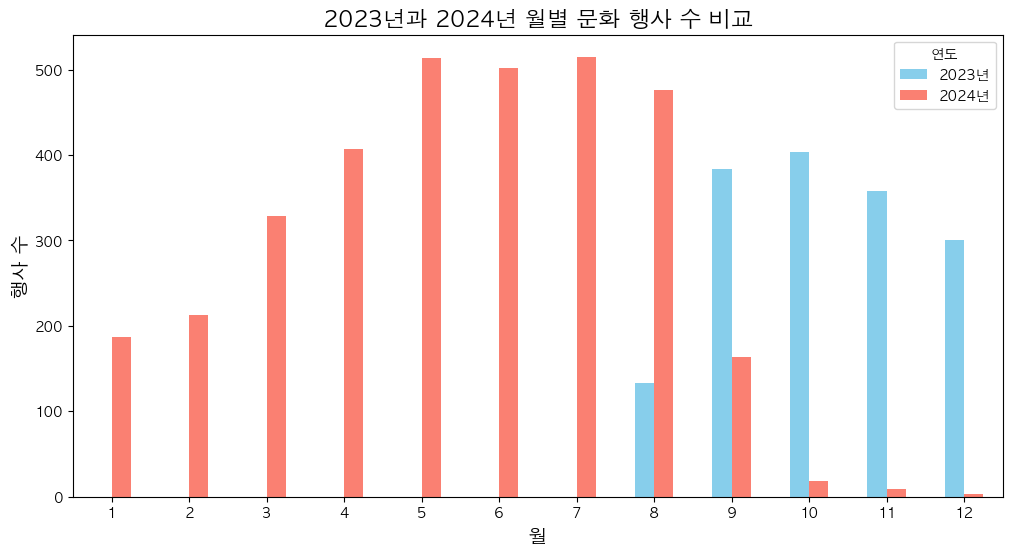

In [82]:
# '시작일' 열을 사용하여 연도 및 월 추출
df['연도'] = df['시작일'].dt.year
df['월'] = df['시작일'].dt.month

# 2023년과 2024년 데이터를 각각 월별로 집계
monthly_event_count_2023 = df[df['연도'] == 2023]['월'].value_counts().sort_index()
monthly_event_count_2024 = df[df['연도'] == 2024]['월'].value_counts().sort_index()

# 두 연도의 데이터를 하나의 DataFrame으로 결합
monthly_event_comparison = pd.DataFrame({
    '2023년': monthly_event_count_2023,
    '2024년': monthly_event_count_2024
}).fillna(0)

# 시각화 (막대그래프)
plt.figure(figsize=(12, 6))
monthly_event_comparison.plot(kind='bar', color=['skyblue', 'salmon'], ax=plt.gca())

# 그래프 제목 및 라벨 설정
plt.title('2023년과 2024년 월별 문화 행사 수 비교', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('행사 수', fontsize=14)

# x축 눈금 설정
plt.xticks(rotation=0)

# 범례 설정
plt.legend(title='연도')

# 그래프 표시
plt.show()

Text(0.5, 1.0, '종류 별 문화 행사')

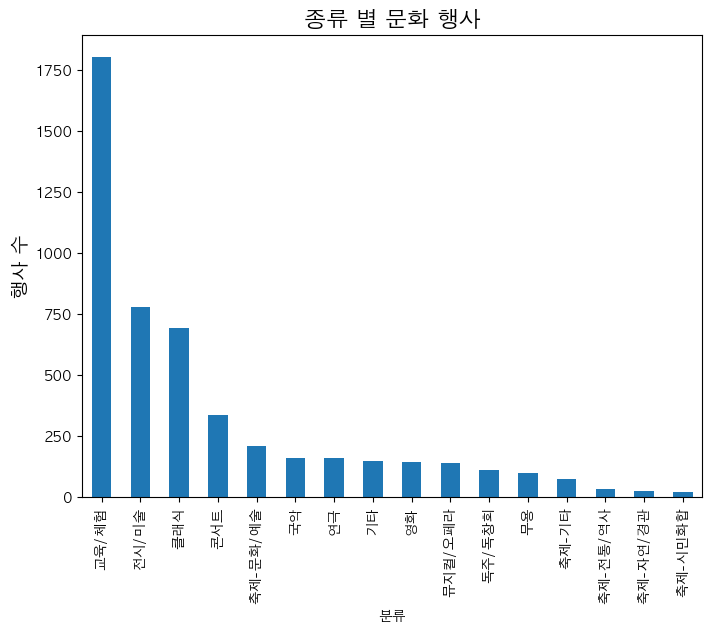

In [88]:
fest_category = df['분류'].value_counts()
fest_category

plt.figure(figsize=(8, 6))

fest_category.plot(kind='bar', ax=plt.gca())
plt.ylabel('행사 수', fontsize=14)

plt.title('종류 별 문화 행사', fontsize=16)


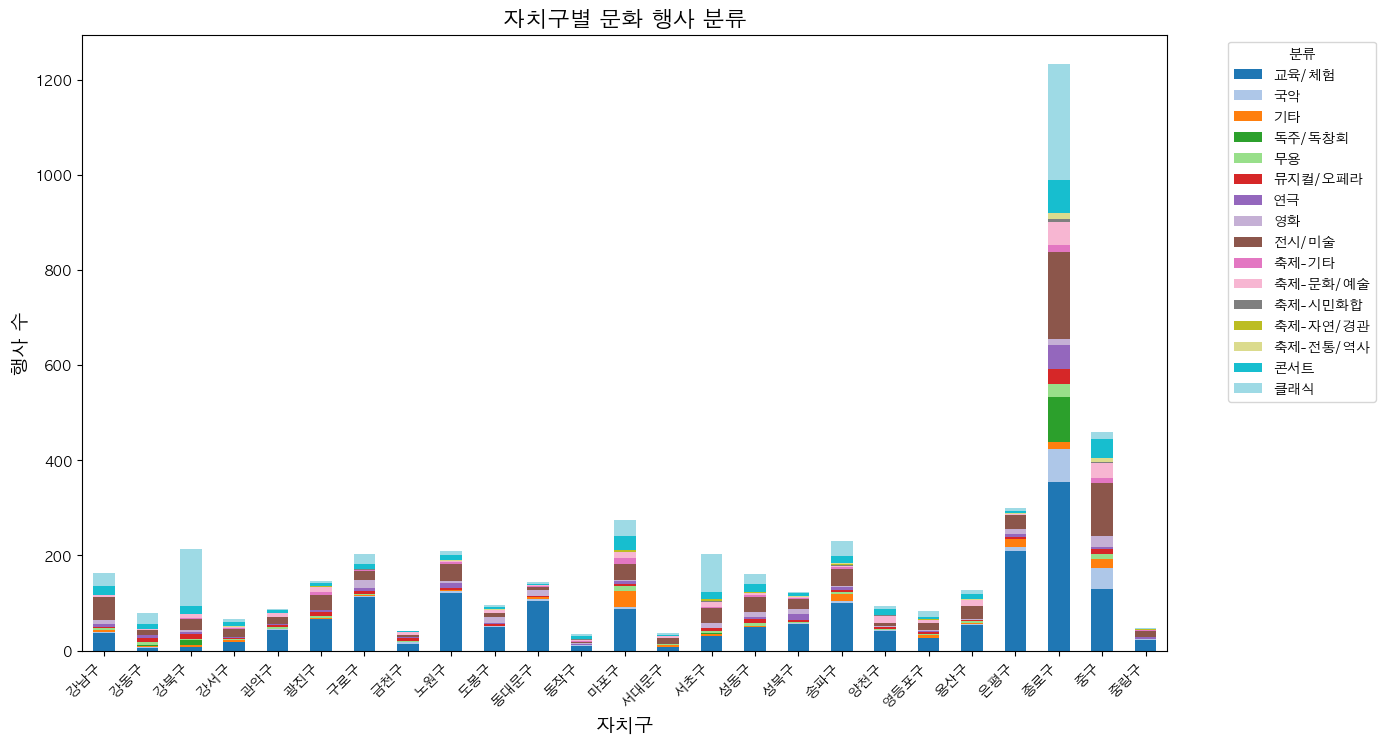

In [89]:
# 자치구별로 분류된 문화 행사 수 집계
district_category_count = df.groupby(['자치구', '분류']).size().unstack(fill_value=0)

# 시각화 (스택형 막대그래프)
plt.figure(figsize=(14, 8))
district_category_count.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# 그래프 제목 및 라벨 설정
plt.title('자치구별 문화 행사 분류', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('행사 수', fontsize=14)

# x축 눈금 설정
plt.xticks(rotation=45, ha='right')

# 범례 설정
plt.legend(title='분류', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.show()